In [1]:
from sklearn import datasets
iris=datasets.load_iris()
digits=datasets.load_digits()

In [2]:
print type(digits)
print type(digits.data)
print digits.data.shape

<class 'sklearn.datasets.base.Bunch'>
<type 'numpy.ndarray'>
(1797, 64)


In [3]:
print digits.images.shape
print digits.images.dtype

(1797, 8, 8)
float64


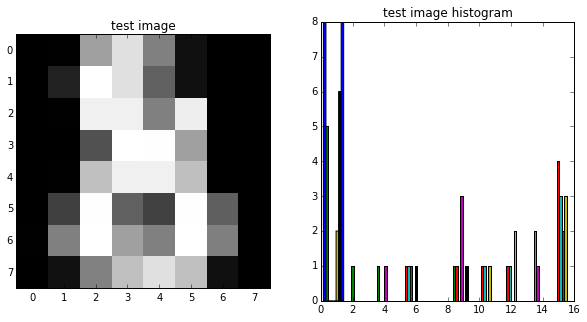

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

testImage=digits.images[-1]

fig=plt.figure(figsize=(10,5))
plt.subplot(121)
imgplot=plt.imshow(testImage, cmap='gray', interpolation='none')
plt.title('test image')
plt.subplot(122)
plt.hist(testImage)
plt.title('test image histogram')
plt.show()

In [5]:
from sklearn import svm
clf=svm.SVC(gamma=0.001, C=100)

In [6]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [7]:
prediction=clf.predict(digits.data[-1:])

In [8]:
print prediction

[8]


In [10]:
from six.moves import cPickle as pickle

pickle_file = '../data/notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

('Training set', (200000, 28, 28), (200000,))
('Validation set', (10000, 28, 28), (10000,))
('Test set', (10000, 28, 28), (10000,))


In [15]:
train_dataset2=train_dataset.reshape(train_dataset.shape[0],train_dataset.shape[1]*train_dataset.shape[2]) 

train_size=1000

train_dataset2=train_dataset2[:train_size,:]
train_labels2=train_labels[:train_size]

print train_dataset2.shape
print

clf2=svm.SVC(gamma=0.001, C=100)
clf2.fit(train_dataset2, train_labels2)

(1000, 784)



SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [24]:
test_dataset2=test_dataset.reshape(test_dataset.shape[0],test_dataset.shape[1]*test_dataset.shape[2]) 

test_size=100

test_dataset2=test_dataset2[:test_size,:]
test_labels2=test_labels[:test_size]

prediction=clf2.predict(test_dataset2)
print prediction.shape

(100,)


In [25]:
print test_labels2
print prediction

[9 6 2 7 5 4 6 5 8 9 5 2 3 7 6 9 1 3 6 1 0 2 6 2 0 0 6 2 0 2 9 3 0 8 9 2 4
 4 0 9 6 6 1 3 1 0 5 0 8 5 2 0 2 4 2 6 5 3 7 1 1 7 8 8 2 3 1 4 5 5 3 9 9 0
 0 2 6 4 7 7 6 3 4 6 3 1 2 9 5 8 3 4 1 9 5 5 4 7 7 8]
[9 4 2 7 5 4 6 5 8 9 5 2 3 7 6 9 1 3 6 1 0 2 6 6 0 0 6 2 9 6 9 3 0 8 6 6 4
 4 0 9 6 6 1 3 1 1 5 0 8 6 8 0 2 4 2 6 5 3 7 1 1 7 8 8 2 3 1 4 5 5 3 9 9 4
 0 2 6 4 7 7 6 3 4 6 3 1 6 9 5 8 3 4 1 9 5 5 4 7 7 8]


In [28]:
errors=0
for i in range(len(test_labels2)):
    if prediction[i]!=test_labels2[i]:
        errors=errors+1
        
print (errors)

11
